In [1]:
import sys
print(sys.executable)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
!{sys.executable} -m pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import plotly
print("Plotly version:", plotly.__version__)

Plotly version: 6.2.0


# Data Collection

In [4]:
import os
import pandas as pd

# ------------------------------------------------------------------
# 1️⃣ Load CSV files
# ------------------------------------------------------------------
main_folder = r'D:\Rap_Gemastik2\plant-pathology-2020-fgvc7'

train_df = pd.read_csv(os.path.join(main_folder, 'train.csv'))
test_df  = pd.read_csv(os.path.join(main_folder, 'test.csv'))

print("Train columns:", train_df.columns.tolist())
print("Test columns :", test_df.columns.tolist())

# ------------------------------------------------------------------
# 2️⃣ Gunakan kolom image_id secara langsung
# ------------------------------------------------------------------
# Misalnya kita hanya ingin menampilkan 5 baris pertama
print("\nSample training set:")
print(train_df[['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']].head())

print("\nSample test set:")
print(test_df['image_id'].head())


Train columns: ['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']
Test columns : ['image_id']

Sample training set:
  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

Sample test set:
0    Test_0
1    Test_1
2    Test_2
3    Test_3
4    Test_4
Name: image_id, dtype: object


# Exploratory Data Analysis

Train shape : (1821, 6)
Test  shape : (1821, 2)

=== ID Ranges ===
Train: min=Train_0, max=Train_999
Test : min=Test_0,  max=Test_999

=== Class distribution (train) ===
healthy              : 516
multiple_diseases    : 91
rust                 : 622
scab                 : 592


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30200\2867949736.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


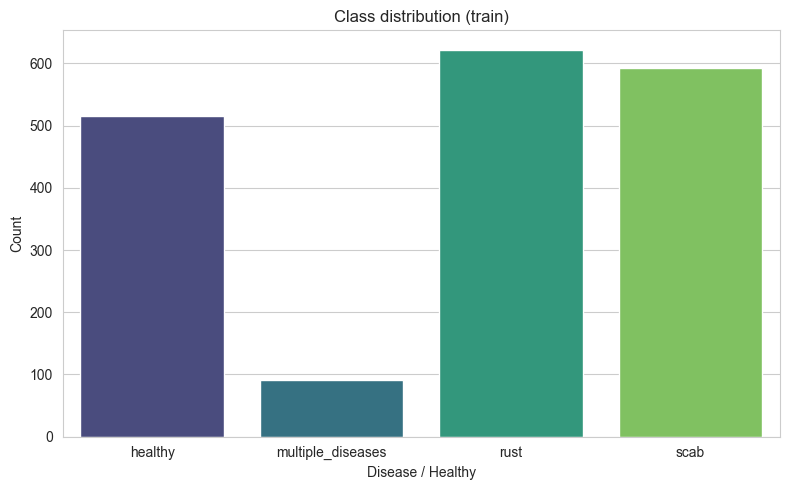


=== Missing values ===
image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
folder               0
dtype: int64
image_id    0
folder      0
dtype: int64

=== Sample training images ===


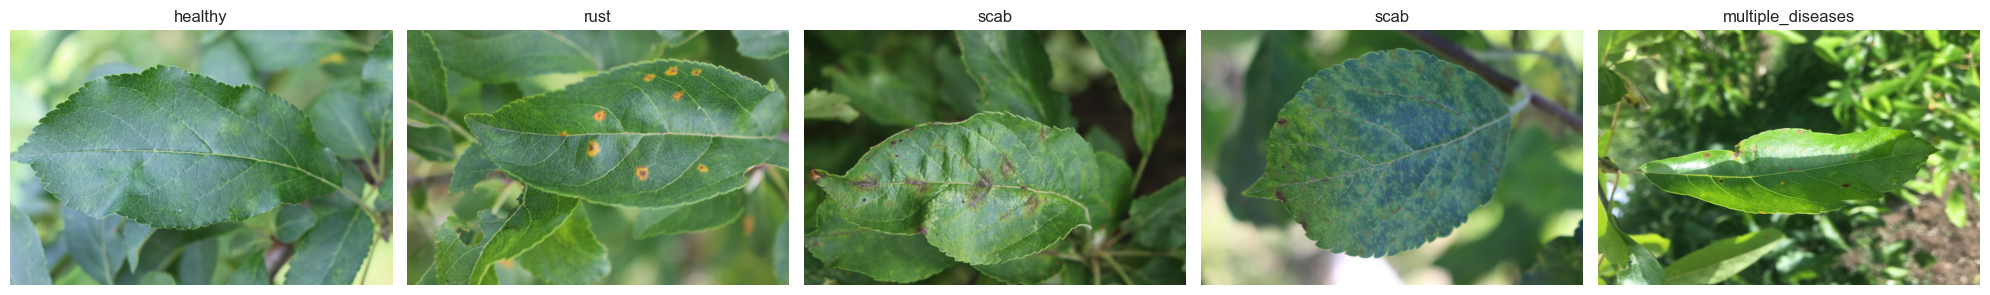


=== Sample test images ===


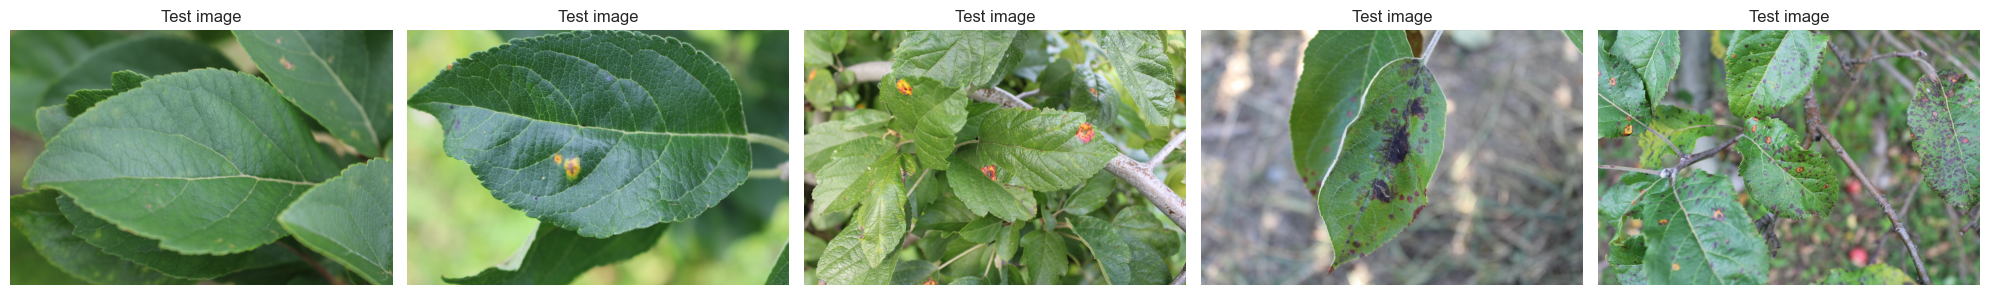

In [5]:
# -------------------------------------------------------
# 1️⃣  Imports & constants
# -------------------------------------------------------
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image


train_df['folder'] = 'images'
test_df['folder'] = 'images'


print(f"Train shape : {train_df.shape}")
print(f"Test  shape : {test_df.shape}\n")

# ------------------------------------------------------------------
# 4️⃣  Basic statistics
# ------------------------------------------------------------------
print("=== ID Ranges ===")
print(f"Train: min={train_df['image_id'].min()}, max={train_df['image_id'].max()}")
print(f"Test : min={test_df['image_id'].min()},  max={test_df['image_id'].max()}")

# Disease columns (kolom biner)
disease_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']

# Hitung jumlah tiap penyakit (jumlah kolom bernilai 1)
print("\n=== Class distribution (train) ===")
class_counts = {col: int(train_df[col].sum()) for col in disease_cols}
for lbl, cnt in class_counts.items():
    print(f"{lbl:20s} : {cnt}")

# Plot bar‑plot distribusi penyakit
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Class distribution (train)")
plt.xlabel("Disease / Healthy")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 5️⃣  Missing‑value check
# ------------------------------------------------------------------
print("\n=== Missing values ===")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# ------------------------------------------------------------------
# 6️⃣  Utility to show sample images
# ------------------------------------------------------------------
def display_sample_images(df: pd.DataFrame, num_samples=5, is_train=True):
    """Tampilkan contoh gambar beserta label (jika train)."""
    if len(df) == 0:
        print("[WARN] DataFrame kosong")
        return

    random.seed(42)
    sample_indices = random.sample(range(len(df)), min(num_samples, len(df)))
    
    fig, axes = plt.subplots(1, num_samples, figsize=(4 * num_samples, 4))
    if num_samples == 1:
        axes = [axes]
    
    for ax, idx in zip(axes, sample_indices):
        row = df.iloc[idx]

        # Buat path dengan .jpg (kalau belum ada)
        image_name = row['image_id']
        if not image_name.lower().endswith('.jpg'):
            image_name += '.jpg'

        # Path lengkap
        img_path = os.path.join(main_folder, row['folder'], image_name)
        
        if not os.path.exists(img_path):
            ax.text(0.5, 0.5, 'Image\nNot Found', ha='center', va='center',
                    fontsize=12, color='red')
            print(f"[WARN] Image not found: {img_path}")
            ax.axis('off')
            continue
        
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.axis('off')
        
        if is_train:
            present = [col for col in disease_cols if row[col] == 1]
            title = ", ".join(present) if present else "Unknown"
        else:
            title = "Test image"
        ax.set_title(title, fontsize=12)
    
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------------
# 7️⃣  Tampilkan contoh
# ------------------------------------------------------------------
print("\n=== Sample training images ===")
display_sample_images(train_df, num_samples=5, is_train=True)

print("\n=== Sample test images ===")
display_sample_images(test_df, num_samples=5, is_train=False)


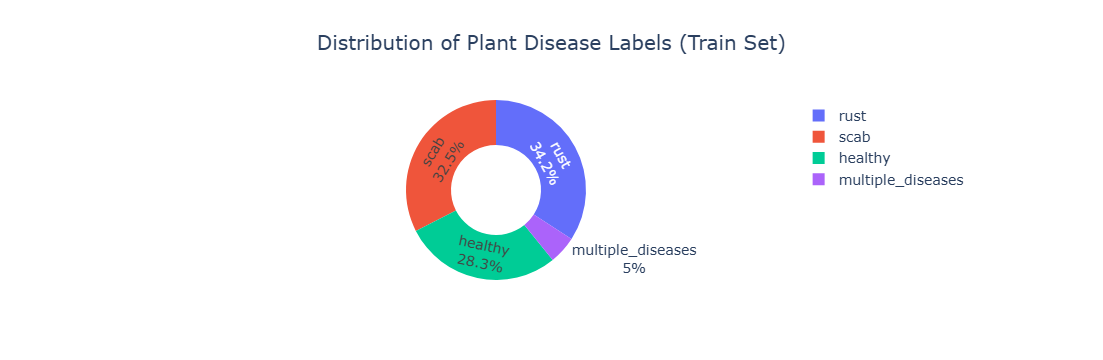

In [6]:
import plotly.express as px
from pathlib import Path

# 🦠 Kolom penyakit (biner)
disease_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']

# 🔢 Hitung jumlah tiap penyakit (jumlah nilai 1 per kolom)
label_counts = (
    train_df[disease_cols]
    .sum()
    .reset_index()
    .rename(columns={'index': 'image_id', 0: 'count'})
)

# 🥧 Buat donut chart (pie)
fig = px.pie(
    label_counts,
    names='image_id',
    values='count',
    hole=0.5,
    title='Distribution of Plant Disease Labels (Train Set)'
)

# ✨ Tambahkan label dan persen di dalam chart
fig.update_traces(
    textinfo='percent+label',
    textfont_size=14
)

# # 🏷️ Anotasi tengah (opsional)
# fig.add_annotation(
#     dict(
#         text="Plant Pathology Dataset",
#         x=0.5, y=0.5,
#         showarrow=False,
#         font=dict(size=13)
#     )
# )

# 🎨 Layout lebih rapi
fig.update_layout(
    title_x=0.5,
    font=dict(size=14)
)

fig.show()

✅ Semua file ditemukan.


Membaca dimensi gambar: 100%|██████████████████████████████████████████████████████████████████| 1821/1821 [00:23<00:00, 77.91it/s]


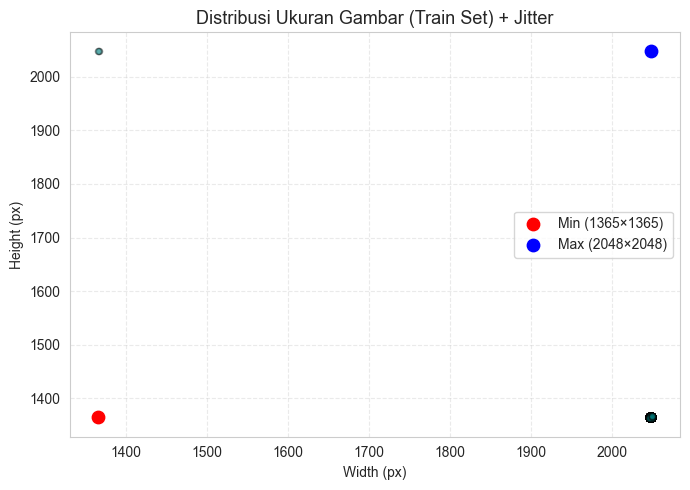


📊 Statistik dimensi gambar:
       width  height
count   1821    1821
mean    2047    1365
std       22      22
min     1365    1365
25%     2048    1365
50%     2048    1365
75%     2048    1365
max     2048    2048

Ukuran unik yang ditemukan:
   width  height  count
0   2048    1365   1819
1   1365    2048      2

📌 Kesimpulan:
Jumlah gambar = 1821
Mayoritas ukuran = 2048×1365 px (jumlah 1819)
Ukuran minimum = 1365×1365 px
Ukuran maksimum = 2048×2048 px


In [7]:
# -------------------------------------------------------------
# 🔍 SCATTER PLOT DIMENSI GAMBAR – PLANT PATHOLOGY DATASET (DENGAN JITTER)
# -------------------------------------------------------------
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Folder utama (sama seperti di EDA)
main_folder = r"D:\Rap_Gemastik2\plant-pathology-2020-fgvc7"

# Pastikan image_id ada ekstensi .jpg
if not train_df['image_id'].iloc[0].lower().endswith('.jpg'):
    train_df['image_id'] = train_df['image_id'].astype(str) + '.jpg'

# Tambahkan kolom folder 'images' (sesuai kode EDA)
train_df['folder'] = 'images'

# Gabungkan menjadi path lengkap
train_df['filepath'] = train_df.apply(
    lambda x: os.path.join(main_folder, x['folder'], x['image_id']),
    axis=1
)

# Cek file yang hilang
missing = train_df[~train_df['filepath'].apply(os.path.exists)]
if len(missing):
    print(f"[WARN] {len(missing)} file tidak ditemukan!")
    print(missing['filepath'].head())
else:
    print("✅ Semua file ditemukan.")

# ============================================================
# 1️⃣  Ambil dimensi gambar
# ============================================================
heights, widths = [], []

for path in tqdm(train_df['filepath'], desc="Membaca dimensi gambar"):
    try:
        img = cv2.imread(path)
        if img is None:
            continue
        h, w = img.shape[:2]
        heights.append(h)
        widths.append(w)
    except Exception as e:
        print(f"[ERR] {path}: {e}")

# ============================================================
# 2️⃣  Tambahkan jitter agar titik tidak menumpuk
# ============================================================
dims_df = pd.DataFrame({'width': widths, 'height': heights})

# Tambahkan noise kecil ±2 piksel
jitter_scale = 2
dims_df['width_jitter'] = dims_df['width'] + np.random.uniform(-jitter_scale, jitter_scale, len(dims_df))
dims_df['height_jitter'] = dims_df['height'] + np.random.uniform(-jitter_scale, jitter_scale, len(dims_df))

# ============================================================
# 3️⃣  Scatter plot dengan jitter + titik min & max
# ============================================================
plt.figure(figsize=(7, 5))
plt.scatter(dims_df['width_jitter'], dims_df['height_jitter'], alpha=0.4, color='teal', edgecolors='k', s=20)

# Titik minimum & maksimum
min_w, min_h = dims_df['width'].min(), dims_df['height'].min()
max_w, max_h = dims_df['width'].max(), dims_df['height'].max()

plt.scatter(min_w, min_h, color='red', s=80, label=f"Min ({min_w}×{min_h})")
plt.scatter(max_w, max_h, color='blue', s=80, label=f"Max ({max_w}×{max_h})")

plt.title("Distribusi Ukuran Gambar (Train Set) + Jitter", fontsize=13)
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.grid(True, ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 4️⃣  Statistik tambahan + kesimpulan
# ============================================================
print("\n📊 Statistik dimensi gambar:")
print(dims_df[['width', 'height']].describe().astype(int))

unique_sizes = dims_df.value_counts(['width', 'height']).reset_index(name='count')
print("\nUkuran unik yang ditemukan:")
print(unique_sizes)

print("\n📌 Kesimpulan:")
print(f"Jumlah gambar = {len(dims_df)}")
print(f"Mayoritas ukuran = {unique_sizes.iloc[0,0]}×{unique_sizes.iloc[0,1]} px (jumlah {unique_sizes.iloc[0,2]})")
print(f"Ukuran minimum = {min_w}×{min_h} px")
print(f"Ukuran maksimum = {max_w}×{max_h} px")


# Data Preprocessing

In [8]:
# =========================================================
# ✅ FINAL DATA PREPROCESSING — PLANT PATHOLOGY 2020 FGVC7
# =========================================================
import os
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import torch
import random

# -------------------------------------------------------------
# 📂 Path utama dataset daun
# -------------------------------------------------------------
main_folder = r"D:\Rap_Gemastik2\plant-pathology-2020-fgvc7"
train_csv = os.path.join(main_folder, "train.csv")

train_df = pd.read_csv(train_csv)
print("✅ Train CSV loaded:", train_df.shape)

# Pastikan format kolom benar
# ['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']
assert all(col in train_df.columns for col in ['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']), \
    "Kolom CSV tidak sesuai dengan format Plant Pathology 2020."

# Tambahkan path file gambar
train_df['image_id'] = train_df['image_id'].astype(str)
if not train_df['image_id'].iloc[0].lower().endswith('.jpg'):
    train_df['image_id'] = train_df['image_id'] + '.jpg'

train_df['filepath'] = train_df['image_id'].apply(lambda x: os.path.join(main_folder, "images", x))

# Pastikan file ada
missing = train_df[~train_df['filepath'].apply(os.path.exists)]
if len(missing) > 0:
    print(f"⚠️ Warning: {len(missing)} file tidak ditemukan!")
else:
    print("✅ Semua file gambar ditemukan.")

# -------------------------------------------------------------
# 🏷️ Multi-label encoding — aman untuk tipe data campuran
# -------------------------------------------------------------
label_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']

# Pastikan semua kolom label ada dan diubah ke float
for col in label_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce').fillna(0.0).astype(np.float32)

num_classes = len(label_cols)
print(f"🧩 Jumlah kelas: {num_classes} ({', '.join(label_cols)})")

# -------------------------------------------------------------
# ✨ Transformasi Data (Augmentasi kuat untuk daun)
# -------------------------------------------------------------
IMG_SIZE = 224
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.7, 1.0), ratio=(0.75, 1.33)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.2, hue=0.05),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.3),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.3),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# -------------------------------------------------------------
# 🧩 Dataset Class
# -------------------------------------------------------------
class LeafDataset(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["filepath"]  # ✅ langsung pakai kolom filepath
        img = Image.open(img_path).convert("RGB")

        if self.transforms:
            img = self.transforms(img)

        # ✅ aman untuk multi-label
        label = torch.tensor(row[label_cols].to_numpy(dtype=np.float32), dtype=torch.float32)

        return img, label


# -------------------------------------------------------------
# 🧪 Split Train / Val — aman dari error class < 2
# -------------------------------------------------------------
# Gunakan stratify pada argmax (kelas dominan)
train_df["dominant_label"] = train_df[label_cols].values.argmax(axis=1)

# Pastikan tidak ada kelas dengan hanya 1 sampel
counts = train_df["dominant_label"].value_counts()
too_small = counts[counts < 2].index.tolist()
if len(too_small) > 0:
    print(f"⚠️ Menghapus kelas dengan sampel <2: {too_small}")
    train_df = train_df[~train_df["dominant_label"].isin(too_small)]

# Split dengan stratify yang aman
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df["dominant_label"],
    random_state=SEED
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# -------------------------------------------------------------
# 🔄 DataLoader
# -------------------------------------------------------------
train_ds = LeafDataset(train_df, transforms=train_transforms)
val_ds = LeafDataset(val_df, transforms=val_transforms)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)

print(f"\n📊 Train: {len(train_ds)} | Val: {len(val_ds)} | IMG_SIZE: {IMG_SIZE}")
print("✅ DataLoader siap digunakan untuk fine-tuning ConvNeXt / EfficientNet / ViT secara offline.")


✅ Train CSV loaded: (1821, 5)
✅ Semua file gambar ditemukan.
🧩 Jumlah kelas: 4 (healthy, multiple_diseases, rust, scab)

📊 Train: 1456 | Val: 365 | IMG_SIZE: 224
✅ DataLoader siap digunakan untuk fine-tuning ConvNeXt / EfficientNet / ViT secara offline.


# Fine-Tuning

In [9]:
# =========================================================
# 🚀 FINE-TUNING CONVNEXT (OFFLINE + MULTILABEL ACCURACY)
# =========================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import convnext_base
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import os

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_CLASSES = 4
EPOCHS = 10
LR = 1e-4
MODEL_PATH = r"D:\Rap_Gemastik2\model\convnext_base_pretrained.pth"  # model lokal kamu
SAVE_PATH = r"D:\Rap_Gemastik2\model\finetuned_convnext_leaf.pth"

# -------------------------------------------------------------
# 🧩 Load Model Pretrained Lokal
# -------------------------------------------------------------
model = convnext_base(weights=None)  # Tidak ambil dari internet
state_dict = torch.load(MODEL_PATH, map_location=DEVICE)
model.load_state_dict(state_dict, strict=False)

# Ganti head classifier → 4 output (multi-label)
in_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(in_features, NUM_CLASSES)
model = model.to(DEVICE)

# -------------------------------------------------------------
# ⚙️ Loss & Optimizer
# -------------------------------------------------------------
criterion = nn.BCEWithLogitsLoss()  # multi-label
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

# -------------------------------------------------------------
# 🧮 Fungsi Akurasi Multi-label
# -------------------------------------------------------------
def multilabel_accuracy(y_true, y_pred, threshold=0.5):
    """
    Menghitung exact match accuracy untuk multi-label classification.
    """
    y_pred_bin = (y_pred > threshold).float()
    correct = (y_pred_bin == y_true).all(dim=1).float()
    return correct.mean().item()

# -------------------------------------------------------------
# 🔁 Training Loop
# -------------------------------------------------------------
best_val_loss = float("inf")

for epoch in range(EPOCHS):
    print(f"\n🌱 Epoch {epoch+1}/{EPOCHS}")
    print("-"*45)

    # -------------------- TRAIN --------------------
    model.train()
    train_loss = 0.0
    for imgs, labels in tqdm(train_loader, desc="Training", ncols=100):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * imgs.size(0)

    train_loss /= len(train_loader.dataset)

    # -------------------- VALIDATION --------------------
    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Validation", ncols=100):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)

            # 🔹 Hitung akurasi (gunakan sigmoid untuk ubah ke probabilitas)
            preds = torch.sigmoid(outputs)
            val_acc += multilabel_accuracy(labels, preds)

    val_loss /= len(val_loader.dataset)
    val_acc /= len(val_loader)

    scheduler.step()

    print(f"📊 Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%")

    # Simpan model terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), SAVE_PATH)
        print(f"✅ Model disimpan (val_loss: {val_loss:.4f})")

print(f"\n🎯 Training selesai! Best Val Loss: {best_val_loss:.4f}")
print(f"💾 Model tersimpan di: {SAVE_PATH}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30200\374967953.py:23: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.




🌱 Epoch 1/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:26<00:00,  1.14s/it]


📊 Train Loss: 0.5532 | Val Loss: 0.5273 | Val Acc: 2.99%
✅ Model disimpan (val_loss: 0.5273)

🌱 Epoch 2/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:26<00:00,  1.16s/it]


📊 Train Loss: 0.5235 | Val Loss: 0.5108 | Val Acc: 4.89%
✅ Model disimpan (val_loss: 0.5108)

🌱 Epoch 3/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:27<00:00,  1.18s/it]


📊 Train Loss: 0.5209 | Val Loss: 0.5135 | Val Acc: 2.17%

🌱 Epoch 4/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:25<00:00,  1.11s/it]


📊 Train Loss: 0.5190 | Val Loss: 0.5124 | Val Acc: 6.25%

🌱 Epoch 5/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:24<00:00,  1.07s/it]


📊 Train Loss: 0.5145 | Val Loss: 0.5106 | Val Acc: 3.26%
✅ Model disimpan (val_loss: 0.5106)

🌱 Epoch 6/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:25<00:00,  1.12s/it]


📊 Train Loss: 0.5163 | Val Loss: 0.5111 | Val Acc: 2.45%

🌱 Epoch 7/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:24<00:00,  1.07s/it]


📊 Train Loss: 0.5133 | Val Loss: 0.5070 | Val Acc: 1.36%
✅ Model disimpan (val_loss: 0.5070)

🌱 Epoch 8/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:25<00:00,  1.12s/it]


📊 Train Loss: 0.5106 | Val Loss: 0.5095 | Val Acc: 1.36%

🌱 Epoch 9/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:24<00:00,  1.08s/it]


📊 Train Loss: 0.5116 | Val Loss: 0.5076 | Val Acc: 1.09%

🌱 Epoch 10/10
---------------------------------------------


Validation: 100%|███████████████████████████████████████████████████| 23/23 [00:25<00:00,  1.09s/it]


📊 Train Loss: 0.5088 | Val Loss: 0.5063 | Val Acc: 1.36%
✅ Model disimpan (val_loss: 0.5063)

🎯 Training selesai! Best Val Loss: 0.5063
💾 Model tersimpan di: D:\Rap_Gemastik2\model\finetuned_convnext_leaf.pth


In [10]:
print(train_df[label_cols].dtypes)
print(train_df[label_cols].head())


healthy              float32
multiple_diseases    float32
rust                 float32
scab                 float32
dtype: object
   healthy  multiple_diseases  rust  scab
0      0.0                0.0   1.0   0.0
1      0.0                0.0   1.0   0.0
2      1.0                0.0   0.0   0.0
3      0.0                0.0   0.0   1.0
4      0.0                0.0   1.0   0.0


# Evaluation

In [11]:
# =========================================================
# ✅ FINAL EVALUATION & SUBMISSION BLOCK (NO LABEL TEST)
# =========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tabulate import tabulate
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

# =========================================================
# 1️⃣ LOSS HISTORY (TABULAR + GRAPH)
# =========================================================
print("\n📉 Loss History (Tabular Text):")
loss_table = []
for i in range(len(history['fold'])):
    loss_table.append([
        history['fold'][i],
        history['epoch'][i],
        f"{history['train_loss'][i]:.4f}",
        f"{history['val_loss'][i]:.4f}"
    ])
print(tabulate(loss_table, headers=["Fold", "Epoch", "Train Loss", "Val Loss"], tablefmt="grid"))

k_folds = len(set(history['fold']))
plt.figure(figsize=(10, 6))
for fold in range(1, k_folds + 1):
    fold_mask = [i for i, f in enumerate(history['fold']) if f == fold]
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['train_loss'][i] for i in fold_mask],
             label=f'Fold {fold} Train', linestyle='--')
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['val_loss'][i] for i in fold_mask],
             label=f'Fold {fold} Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss per Fold')
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 2️⃣ ACCURACY HISTORY (TABULAR + GRAPH)
# =========================================================
print("\n📊 Metrics History (Tabular Text):")
metrics_table = []
for i in range(len(history['fold'])):
    metrics_table.append([
        history['fold'][i],
        history['epoch'][i],
        f"{history['val_accuracy'][i]:.4f}"
    ])
print(tabulate(metrics_table, headers=["Fold", "Epoch", "Accuracy"], tablefmt="grid"))

plt.figure(figsize=(10, 6))
for fold in range(1, k_folds + 1):
    fold_mask = [i for i, f in enumerate(history['fold']) if f == fold]
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['val_accuracy'][i] for i in fold_mask],
             label=f'Fold {fold}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across Folds')
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 3️⃣ INTERNAL VALIDATION EVALUATION (CONFUSION MATRIX + REPORT)
# =========================================================
print("\n🧩 Internal Validation Evaluation (from val_loader):")
val_preds, val_labels = [], []
model.eval()
with torch.no_grad():
    for batch in val_loader:
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(pixel_values=pixel_values)
        preds = torch.argmax(outputs.logits, dim=1)
        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

unique_label_ids = sorted(np.unique(val_labels))
used_classes = [classes[i] for i in unique_label_ids]

print("\n📋 Classification Report (Validation Set):")
print(classification_report(
    val_labels,
    val_preds,
    labels=unique_label_ids,
    target_names=used_classes,
    zero_division=0
))

val_cm = confusion_matrix(val_labels, val_preds, labels=unique_label_ids)
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# =========================================================
# 4️⃣ LEADERBOARD SIMULATION (60:40 SPLIT dari VALIDASI)
# =========================================================
print("\n🏆 Simulated Leaderboard (Validation 60% vs 40%)")

X_60, X_40, y_60, y_40 = train_test_split(
    val_preds, val_labels, test_size=0.4, random_state=42, stratify=val_labels
)

acc_60 = accuracy_score(y_60, X_60)
f1_60 = f1_score(y_60, X_60, average='weighted')

acc_40 = accuracy_score(y_40, X_40)
f1_40 = f1_score(y_40, X_40, average='weighted')

print("\n==================== 🏅 LEADERBOARD SIMULATION ====================")
print(f"Simulated Public Leaderboard (60% Validation):")
print(f"  Accuracy : {acc_60:.4f}")
print(f"  F1-score : {f1_60:.4f}")

print(f"\nSimulated Private Leaderboard (40% Remaining):")
print(f"  Accuracy : {acc_40:.4f}")
print(f"  F1-score : {f1_40:.4f}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_60, X_60), annot=True, fmt='d', cmap='Greens',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Public Leaderboard (60%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_40, X_40), annot=True, fmt='d', cmap='Oranges',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Private Leaderboard (40%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



📉 Loss History (Tabular Text):


NameError: name 'history' is not defined

# Submission

In [ ]:
# =========================================================
# 5️⃣ SUBMISSION FILE CREATION
# =========================================================
print("\n📦 Generating Kaggle Submission File...")

model.eval()
submission_preds = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Inference on Test Set"):
        pixel_values = batch['pixel_values'].to(device)
        outputs = model(pixel_values=pixel_values)
        preds = torch.argmax(outputs.logits, dim=1)
        submission_preds.extend(preds.cpu().numpy())

# Load sample submission
sample_submission = pd.read_csv("/mnt/data/sample_submission.csv")
sample_submission["label"] = [classes[p] for p in submission_preds[:len(sample_submission)]]

# Save final submission file
output_path = "submission_vit_streetfood.csv"
sample_submission.to_csv(output_path, index=False)
print(f"\n✅ Submission file saved as: {output_path}")

# =========================================================
# 6️⃣ VISUAL CHECK
# =========================================================
print("\n🔍 Preview of Submission File:")
print(sample_submission.head())